## Task Definition

Task Definition...

### Imports

In [16]:
import yfinance as yf
import numpy as np 
import pandas as pd 
import seaborn as sns

### Load SP500

In [25]:
# load sp500
sp500 = pd.read_csv('data/sp500_nasdaq.csv', parse_dates=['Date'], index_col='Date')
sp500.rename({'Close/Last': 'Close'}, axis=1, inplace=1)
sp500.head()

,Close,Open,High,Low
Date,,,,
2024-11-22,5969.34,5944.36,5972.90,5944.36
2024-11-21,5948.71,5940.58,5963.32,5887.26
2024-11-20,5917.11,5914.34,5920.67,5860.56
2024-11-19,5916.98,5870.05,5923.51,5855.29
2024-11-18,5893.62,5874.17,5908.12,5865.95


<Axes: xlabel='Date'>

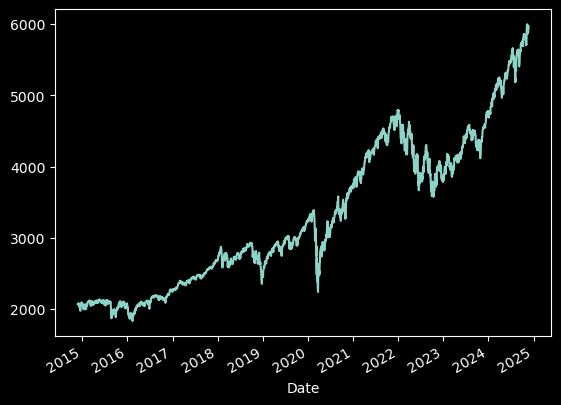

In [26]:
sp500['Close'].plot()

### Load SP500 Companies

In [82]:
sp500 = pd.read_csv('data/sp500_stock_data.csv', index_col='Date', parse_dates=['Date'])
sp500.head(2)

,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,37.422054,24.347176,43.563183,NaN,37.108742,18.539352,75.312744,72.339996,45.276855,39.133034,...,101.138016,24.435719,127.231209,26.591127,60.042542,33.639442,43.244240,101.157684,77.430000,40.278927
2015-01-05,36.720844,23.661276,42.743355,NaN,37.117008,18.428413,74.041145,71.980003,44.453495,37.778957,...,100.411552,24.435719,125.065750,26.289295,58.399670,31.545816,42.365601,104.931259,76.339996,40.037121


In [83]:
sp500_T = sp500.T
sp500_T.head()

Date,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,...,2022-12-16,2022-12-19,2022-12-20,2022-12-21,2022-12-22,2022-12-23,2022-12-27,2022-12-28,2022-12-29,2022-12-30
A,37.422054,36.720844,36.148823,36.628590,37.726513,37.449730,37.006863,36.490200,36.038105,35.069328,...,147.254105,144.936310,145.902893,148.033279,146.968079,147.185089,147.500702,146.060669,149.019577,147.819427
AAPL,24.347176,23.661276,23.663507,23.995317,24.917265,24.943995,24.329359,24.545374,24.451841,23.788216,...,133.110214,130.992493,130.923218,134.040436,130.853958,130.487778,128.676849,124.728363,128.261200,128.577881
ABBV,43.563183,42.743355,42.531780,44.250771,44.713585,43.490467,43.477226,42.224934,42.431438,41.891876,...,148.808945,149.745483,148.901688,150.413116,151.396042,151.238419,151.136383,150.431656,150.737671,149.856750
ABNB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,89.570000,85.930000,87.620003,87.070000,84.870003,85.250000,83.489998,82.489998,85.230003,85.500000
ABT,37.108742,37.117008,36.695507,36.993031,37.753391,37.356678,37.670734,37.064209,36.790043,36.515865,...,102.762489,102.454895,102.358765,103.944763,103.839020,103.983208,104.358078,103.646790,106.030579,105.530746


### Load IEUR

In [84]:
europe_ieur = yf.download("IEUR", start="2015-01-01", end="2023-01-01")
europe_ieur.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,IEUR,IEUR,IEUR,IEUR,IEUR,IEUR
Date,,,,,,
2015-01-02,32.641060,43.500000,43.770000,43.340000,43.700001,19700
2015-01-05,31.665581,42.200001,42.770000,42.119999,42.770000,95100
2015-01-06,31.350428,41.779999,42.360001,41.689999,42.290001,30900
2015-01-07,31.635569,42.160000,42.230000,41.700001,41.900002,20300
2015-01-08,32.048271,42.709999,42.900002,42.419998,42.419998,40800


In [86]:
europe_ieur.columns = europe_etf.columns.droplevel(1)
europe_ieur = europe_ieur[['Adj Close', 'Volume']]
europe_ieur.head()

Price,Adj Close,Volume
Date,,
2015-01-02,32.641060,19700
2015-01-05,31.665581,95100
2015-01-06,31.350428,30900
2015-01-07,31.635569,20300
2015-01-08,32.048271,40800


### Query Example: AAPL

In [3]:

# Download historical data for Apple
data = yf.download("AAPL", start="2020-01-01", end="2023-01-01")

# Preview the data
print(data.head())
data.columns

[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                                        
2020-01-02  72.796021  75.087502  75.150002  73.797501  74.059998  135480400
2020-01-03  72.088287  74.357498  75.144997  74.125000  74.287498  146322800
2020-01-06  72.662697  74.949997  74.989998  73.187500  73.447502  118387200
2020-01-07  72.320976  74.597504  75.224998  74.370003  74.959999  108872000
2020-01-08  73.484344  75.797501  76.110001  74.290001  74.290001  132079200


MultiIndex([('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [4]:
ticker = yf.Ticker("AAPL")

# Get the current market price
price = ticker.history(period="1d")["Close"].iloc[-1]
print(f"Current price of AAPL: {price}")

info = ticker.info
# Example metadata
print("Company Name:", info["longName"])
print("Sector:", info["sector"])
print("Industry:", info["industry"])

# Dividends
dividends = ticker.dividends
print(dividends)

# Splits
splits = ticker.splits
print(splits)

Current price of AAPL: 229.8699951171875
Company Name: Apple Inc.
Sector: Technology
Industry: Consumer Electronics
Series([], Name: Dividends, dtype: float64)
Series([], Name: Stock Splits, dtype: float64)


### Europe ETFs

Some examples of European ETFs you might find include:

- VGK: Vanguard FTSE Europe ETF
- IEUR: iShares MSCI Europe ETF
- EFA: iShares MSCI EAFE ETF (EAFE covers developed markets outside of the U.S. and Canada, including many European countries)
- SGLD: SPDR Gold Shares (with European listings)

In [12]:
import yfinance as yf

# Example: iShares MSCI Europe ETF (Ticker: IMEU.L, listed in London)
europe_etf = yf.download("IMEU.MI", start="2020-01-01", end="2023-01-01")
europe_etf = yf.download("IEUR", start="2020-01-01", end="2023-01-01")

print(europe_etf.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open   Volume
Ticker           IEUR       IEUR       IEUR       IEUR       IEUR     IEUR
Date                                                                      
2020-01-02  43.898575  50.240002  50.294998  50.080002  50.130001   312800
2020-01-03  43.400513  49.669998  49.865002  49.549999  49.610001  2366200
2020-01-06  43.479153  49.759998  49.799999  49.480000  49.480000   191800
2020-01-07  43.304394  49.560001  49.650002  49.500000  49.639999   399200
2020-01-08  43.383041  49.650002  49.790001  49.430000  49.459999   725500


Date
2014-12-17 00:00:00-05:00    0.281
2015-06-25 00:00:00-04:00    0.898
2015-12-21 00:00:00-05:00    0.281
2016-06-22 00:00:00-04:00    0.948
2016-12-21 00:00:00-05:00    0.352
2017-06-20 00:00:00-04:00    0.791
2017-12-19 00:00:00-05:00    0.531
2018-06-19 00:00:00-04:00    1.226
2018-12-18 00:00:00-05:00    0.329
2019-06-17 00:00:00-04:00    1.231
Name: Dividends, dtype: float64
{'phone': '1-800-474-2737', 'longBusinessSummary': 'The fund generally will invest at least 80% of its assets in the component securities of its underlying index and in investments that have economic characteristics that are substantially identical to the component securities of its underlying index. The index is a free float-adjusted market capitalization-weighted index which consists of securities from the following 15 developed market countries or regions: Austria, Belgium, Denmark, Finland, France, Germany, Ireland, Italy, the Netherlands, Norway, Portugal, Spain, Sweden, Switzerland and the United Kin

<Axes: title={'center': 'IEUR Dividents'}, xlabel='Date'>

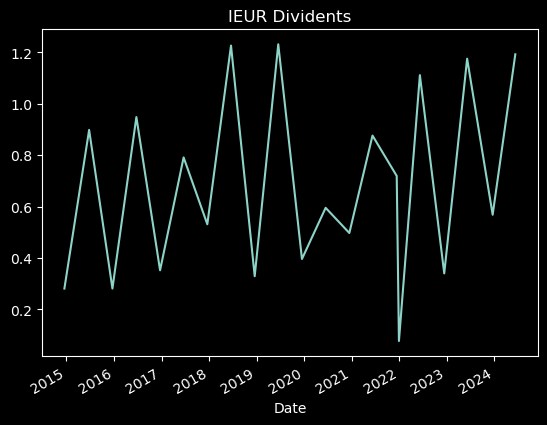

In [87]:
etf_ticker = yf.Ticker("IEUR")
print(etf_ticker.dividends[:10])
print(etf_ticker.info)
etf_ticker.dividends.plot(title='IEUR Dividents')

### SP500 companies

In [38]:
# Load list of S&P 500 companies from Wikipedia
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
tables = pd.read_html(url)

# The first table contains the S&P 500 companies
sp500_table = tables[0]

# Extract the ticker symbols
tickers = sp500_table['Symbol'].tolist()

sp500_table.head()


,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [60]:
from time import time

# Define the start and end dates for historical data
start_date = '2015-01-01'
end_date = '2023-01-01'

# Create an empty dictionary to store data for each ticker
data = {}
sp500_df = pd.DataFrame(index=pd.date_range(start=start_date, end=end_date, freq='D'))

# Loop through each ticker and download data
for ticker in sorted(tickers):
    try:
        stock_data = yf.download(ticker, start=start_date, end=end_date)
        sp500_df[ticker] = stock_data['Adj Close']
        print(f"Downloaded data for {ticker}")

        # Optional: Pause between requests to avoid hitting rate limits
        time.sleep(1)  # Pause for 1 second
    except Exception as e:
        print(f"Could not download data for {ticker}: {e}")

sp500_df.head()

# Step 5: Save the combined dataframe to a CSV file
sp500_df.to_csv('sp500_stock_data.csv', index=True)

# print("Data saved to 'sp500_stock_data.csv'")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Downloaded data for A
Downloaded data for AAPL
Downloaded data for ABBV
Downloaded data for ABNB
Downloaded data for ABT
Downloaded data for ACGL
Downloaded data for ACN
Downloaded data for ADBE
Downloaded data for ADI
Downloaded data for ADM


[*********************100%***********************]  1 of 1 completed


Downloaded data for ADP


[*********************100%***********************]  1 of 1 completed


Downloaded data for ADSK


[*********************100%***********************]  1 of 1 completed


Downloaded data for AEE


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Downloaded data for AEP
Downloaded data for AES
Downloaded data for AFL


[*********************100%***********************]  1 of 1 completed


Downloaded data for AIG


[*********************100%***********************]  1 of 1 completed


Downloaded data for AIZ


[*********************100%***********************]  1 of 1 completed


Downloaded data for AJG


[*********************100%***********************]  1 of 1 completed


Downloaded data for AKAM


[*********************100%***********************]  1 of 1 completed


Downloaded data for ALB


[*********************100%***********************]  1 of 1 completed


Downloaded data for ALGN


[*********************100%***********************]  1 of 1 completed


Downloaded data for ALL


[*********************100%***********************]  1 of 1 completed


Downloaded data for ALLE


[*********************100%***********************]  1 of 1 completed


Downloaded data for AMAT


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Downloaded data for AMCR
Downloaded data for AMD


[*********************100%***********************]  1 of 1 completed


Downloaded data for AME


[*********************100%***********************]  1 of 1 completed


Downloaded data for AMGN


[*********************100%***********************]  1 of 1 completed


Downloaded data for AMP


[*********************100%***********************]  1 of 1 completed


Downloaded data for AMT


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AMTM']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2015-01-01 -> 2023-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1420088400, endDate = 1672549200")')


Downloaded data for AMTM


[*********************100%***********************]  1 of 1 completed


Downloaded data for AMZN


[*********************100%***********************]  1 of 1 completed


Downloaded data for ANET


[*********************100%***********************]  1 of 1 completed


Downloaded data for ANSS


[*********************100%***********************]  1 of 1 completed


Downloaded data for AON


[*********************100%***********************]  1 of 1 completed


Downloaded data for AOS


[*********************100%***********************]  1 of 1 completed


Downloaded data for APA


[*********************100%***********************]  1 of 1 completed


Downloaded data for APD


[*********************100%***********************]  1 of 1 completed


Downloaded data for APH


[*********************100%***********************]  1 of 1 completed


Downloaded data for APTV


[*********************100%***********************]  1 of 1 completed


Downloaded data for ARE


[*********************100%***********************]  1 of 1 completed


Downloaded data for ATO


[*********************100%***********************]  1 of 1 completed


Downloaded data for AVB


[*********************100%***********************]  1 of 1 completed


Downloaded data for AVGO


[*********************100%***********************]  1 of 1 completed


Downloaded data for AVY


[*********************100%***********************]  1 of 1 completed


Downloaded data for AWK


[*********************100%***********************]  1 of 1 completed


Downloaded data for AXON


[*********************100%***********************]  1 of 1 completed


Downloaded data for AXP


[*********************100%***********************]  1 of 1 completed


Downloaded data for AZO


[*********************100%***********************]  1 of 1 completed


Downloaded data for BA


[*********************100%***********************]  1 of 1 completed


Downloaded data for BAC


[*********************100%***********************]  1 of 1 completed


Downloaded data for BALL


[*********************100%***********************]  1 of 1 completed


Downloaded data for BAX


[*********************100%***********************]  1 of 1 completed


Downloaded data for BBY


[*********************100%***********************]  1 of 1 completed


Downloaded data for BDX


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2015-01-01 -> 2023-01-01)')


Downloaded data for BEN
Downloaded data for BF.B


[*********************100%***********************]  1 of 1 completed


Downloaded data for BG


[*********************100%***********************]  1 of 1 completed


Downloaded data for BIIB


[*********************100%***********************]  1 of 1 completed


Downloaded data for BK


[*********************100%***********************]  1 of 1 completed


Downloaded data for BKNG


[*********************100%***********************]  1 of 1 completed


Downloaded data for BKR


[*********************100%***********************]  1 of 1 completed


Downloaded data for BLDR


[*********************100%***********************]  1 of 1 completed


Downloaded data for BLK


[*********************100%***********************]  1 of 1 completed


Downloaded data for BMY


[*********************100%***********************]  1 of 1 completed


Downloaded data for BR


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Downloaded data for BRK.B


[*********************100%***********************]  1 of 1 completed


Downloaded data for BRO


[*********************100%***********************]  1 of 1 completed


Downloaded data for BSX


[*********************100%***********************]  1 of 1 completed


Downloaded data for BWA


[*********************100%***********************]  1 of 1 completed


Downloaded data for BX


[*********************100%***********************]  1 of 1 completed


Downloaded data for BXP


[*********************100%***********************]  1 of 1 completed


Downloaded data for C


[*********************100%***********************]  1 of 1 completed


Downloaded data for CAG


[*********************100%***********************]  1 of 1 completed


Downloaded data for CAH


[*********************100%***********************]  1 of 1 completed


Downloaded data for CARR


[*********************100%***********************]  1 of 1 completed


Downloaded data for CAT


[*********************100%***********************]  1 of 1 completed


Downloaded data for CB


[*********************100%***********************]  1 of 1 completed


Downloaded data for CBOE


[*********************100%***********************]  1 of 1 completed


Downloaded data for CBRE


[*********************100%***********************]  1 of 1 completed


Downloaded data for CCI


[*********************100%***********************]  1 of 1 completed


Downloaded data for CCL


[*********************100%***********************]  1 of 1 completed


Downloaded data for CDNS


[*********************100%***********************]  1 of 1 completed


Downloaded data for CDW


[*********************100%***********************]  1 of 1 completed


Downloaded data for CE


[*********************100%***********************]  1 of 1 completed


Downloaded data for CEG


[*********************100%***********************]  1 of 1 completed


Downloaded data for CF


[*********************100%***********************]  1 of 1 completed


Downloaded data for CFG


[*********************100%***********************]  1 of 1 completed


Downloaded data for CHD


[*********************100%***********************]  1 of 1 completed


Downloaded data for CHRW


[*********************100%***********************]  1 of 1 completed


Downloaded data for CHTR


[*********************100%***********************]  1 of 1 completed


Downloaded data for CI


[*********************100%***********************]  1 of 1 completed


Downloaded data for CINF


[*********************100%***********************]  1 of 1 completed


Downloaded data for CL


[*********************100%***********************]  1 of 1 completed


Downloaded data for CLX


[*********************100%***********************]  1 of 1 completed


Downloaded data for CMCSA


[*********************100%***********************]  1 of 1 completed


Downloaded data for CME


[*********************100%***********************]  1 of 1 completed


Downloaded data for CMG


[*********************100%***********************]  1 of 1 completed


Downloaded data for CMI


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for CMS


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for CNC


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for CNP


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for COF


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for COO


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for COP


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for COR


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for COST


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for CPAY


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for CPB


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for CPRT


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for CPT


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for CRL


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for CRM


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for CRWD


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for CSCO


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for CSGP


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for CSX


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for CTAS


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for CTLT


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for CTRA


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for CTSH


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for CTVA


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for CVS


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for CVX


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for CZR


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for D


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for DAL


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for DAY


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for DD


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for DE


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for DECK


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for DELL


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for DFS


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for DG


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for DGX


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for DHI


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for DHR


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for DIS


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for DLR


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for DLTR


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for DOC


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for DOV


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for DOW


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for DPZ


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for DRI


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for DTE


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for DUK


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for DVA


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for DVN


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for DXCM


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for EA


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for EBAY


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for ECL


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for ED


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for EFX


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for EG


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for EIX


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for EL


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for ELV


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for EMN


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for EMR


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for ENPH


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for EOG


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for EPAM


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for EQIX


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for EQR


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for EQT


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for ERIE


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for ES


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for ESS


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for ETN


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for ETR


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for EVRG


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for EW


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for EXC


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for EXPD


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for EXPE


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for EXR


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for F


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for FANG


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for FAST


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for FCX


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for FDS


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for FDX


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for FE


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for FFIV


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for FI


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for FICO


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for FIS


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for FITB


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for FMC


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for FOX


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for FOXA


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for FRT


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for FSLR


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for FTNT


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for FTV


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for GD


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for GDDY


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for GE


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for GEHC


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for GEN


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['GEV']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2015-01-01 -> 2023-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1420088400, endDate = 1672549200")')
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for GEV


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for GILD


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for GIS


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for GL


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for GLW


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for GM


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for GNRC


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for GOOG


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for GOOGL


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for GPC


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for GPN


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for GRMN


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for GS


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for GWW


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for HAL


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for HAS


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for HBAN


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for HCA


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for HD


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for HES


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for HIG


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for HII


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for HLT


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for HOLX


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for HON


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for HPE


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for HPQ


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for HRL


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for HSIC


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for HST


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for HSY


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for HUBB


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for HUM


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for HWM


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for IBM


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for ICE


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for IDXX


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for IEX


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for IFF


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for INCY


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for INTC


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for INTU


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for INVH


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for IP


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for IPG


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for IQV


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for IR


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for IRM


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for ISRG


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for IT


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for ITW


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for IVZ


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for J


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for JBHT


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for JBL


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for JCI


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for JKHY


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for JNJ


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for JNPR


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for JPM


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for K


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for KDP


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for KEY


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for KEYS


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for KHC


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for KIM


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for KKR


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for KLAC


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for KMB


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for KMI


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for KMX


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for KO


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for KR


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['KVUE']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2015-01-01 -> 2023-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1420088400, endDate = 1672549200")')
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for KVUE


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for L


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for LDOS


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for LEN


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for LH


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for LHX


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for LIN


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for LKQ


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for LLY


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for LMT


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for LNT


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for LOW


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for LRCX


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for LULU


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for LUV


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for LVS


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for LW


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for LYB


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for LYV


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for MA


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for MAA


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for MAR


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for MAS


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for MCD


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for MCHP


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for MCK


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for MCO


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for MDLZ


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for MDT


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for MET


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for META


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for MGM


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for MHK


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for MKC


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for MKTX


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for MLM


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for MMC


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for MMM


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for MNST


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for MO


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for MOH


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for MOS


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for MPC


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for MPWR


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for MRK


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for MRNA


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for MS


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for MSCI


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for MSFT


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for MSI


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for MTB


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for MTCH


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for MTD


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for MU


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for NCLH


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for NDAQ


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for NDSN


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for NEE


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for NEM


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for NFLX


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for NI


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for NKE


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for NOC


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for NOW


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for NRG


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for NSC


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for NTAP


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for NTRS


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for NUE


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for NVDA


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for NVR


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for NWS


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for NWSA


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for NXPI


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for O


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for ODFL


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for OKE


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for OMC


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for ON


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for ORCL


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for ORLY


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for OTIS


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for OXY


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for PANW


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for PARA


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for PAYC


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for PAYX


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for PCAR


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for PCG


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for PEG


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for PEP


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for PFE


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for PFG


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for PG


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for PGR


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for PH


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for PHM


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for PKG


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for PLD


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for PLTR


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for PM


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for PNC


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for PNR


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for PNW


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for PODD


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for POOL


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for PPG


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for PPL


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for PRU


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for PSA


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for PSX


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for PTC


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for PWR


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for PYPL


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for QCOM


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for QRVO


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for RCL


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for REG


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for REGN


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for RF


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for RJF


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for RL


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for RMD


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for ROK


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for ROL


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for ROP


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for ROST


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for RSG


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for RTX


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for RVTY


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for SBAC


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for SBUX


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for SCHW


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for SHW


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for SJM


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for SLB


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for SMCI


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for SNA


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for SNPS


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for SO


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SOLV']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2015-01-01 -> 2023-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1420088400, endDate = 1672549200")')
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for SOLV


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for SPG


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for SPGI


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for SRE


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for STE


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for STLD


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for STT


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for STX


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for STZ


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SW']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2015-01-01 -> 2023-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1420088400, endDate = 1672549200")')
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for SW


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for SWK


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for SWKS


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for SYF


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for SYK


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for SYY


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for T


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for TAP


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for TDG


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for TDY


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for TECH


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for TEL


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for TER


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for TFC


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for TFX


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for TGT


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for TJX


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for TMO


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for TMUS


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for TPR


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for TRGP


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for TRMB


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for TROW


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for TRV


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for TSCO


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for TSLA


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for TSN


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for TT


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for TTWO


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for TXN


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for TXT


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for TYL


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for UAL


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for UBER


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for UDR


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for UHS


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for ULTA


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for UNH


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for UNP


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for UPS


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for URI


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for USB


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for V


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for VICI


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for VLO


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['VLTO']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2015-01-01 -> 2023-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1420088400, endDate = 1672549200")')
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for VLTO


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for VMC


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for VRSK


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for VRSN


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for VRTX


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for VST


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for VTR


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for VTRS


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for VZ


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for WAB


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for WAT


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for WBA


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for WBD


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for WDC


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for WEC


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for WELL


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for WFC


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for WM


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for WMB


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for WMT


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for WRB


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for WST


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for WTW


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for WY


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for WYNN


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for XEL


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for XOM


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for XYL


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for YUM


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for ZBH


[*********************100%***********************]  1 of 1 completed
/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


Downloaded data for ZBRA


[*********************100%***********************]  1 of 1 completed

Downloaded data for ZTS



/var/folders/cj/fzhjw_nx32q2sxr47_780dtw0000gn/T/ipykernel_67966/787630627.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sp500_df[ticker] = stock_data['Adj Close']


,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,37.422054,24.347176,43.563183,NaN,37.108742,18.539352,75.312744,72.339996,45.276855,39.133034,...,101.138016,24.435719,127.231209,26.591127,60.042542,33.639442,43.244240,101.157684,77.430000,40.278927
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,36.720844,23.661276,42.743355,NaN,37.117008,18.428413,74.041145,71.980003,44.453495,37.778957,...,100.411552,24.435719,125.065750,26.289295,58.399670,31.545816,42.365601,104.931259,76.339996,40.037121


In [79]:
print(sp500_df.shape)
print(sp500_df.dropna(how='all').shape)
sp500_df = sp500_df.reset_index().rename(columns={'index': 'Date'}) 
sp500_df.to_csv('data/sp500_stock_data.csv', index=False)
#sp500_df = sp500_df.dropna(how='all').T
#sp500_df.to_csv('sp500_stock_data_T.csv', index=True)
sp500_df.head(2)

(2014, 494)
(2014, 494)


,Date,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
0,2015-01-02,37.422054,24.347176,43.563183,NaN,37.108742,18.539352,75.312744,72.339996,45.276855,...,101.138016,24.435719,127.231209,26.591127,60.042542,33.639442,43.244240,101.157684,77.430000,40.278927
1,2015-01-05,36.720844,23.661276,42.743355,NaN,37.117008,18.428413,74.041145,71.980003,44.453495,...,100.411552,24.435719,125.065750,26.289295,58.399670,31.545816,42.365601,104.931259,76.339996,40.037121
